<center><h1><strong> Magnitudes de la radiación solar y sus perfiles de curvas de intensidad en un sitio particular en una superficie inclinada </strong></h1>
Por: Guzmán Miranda Eduardo </center>

<h2>Problema</h2>
Con  el  mapa  de  radiación solar  por  sitio,  día,  mes  del  año;  y  los  datos  de  al  menos  4  trayectorias  solares construidas  para cuatro  días  con  al  menos  8  datos del  ángulo  de  incidencia para  h  =  6,  8,  10,  12,  14,  16, 18,  20 hrs  en el sitio  que  tú  elijas  y  los  4  momentos  del  año  (longitud  y  declinación);  y  fijando  una  superficie inclinada  un  ángulo  igual  al  de  la  latitud  del  sitio  y  siendo  el  área  del  colector  de  1  metro  por  2  metros, sobre  un  sitio  que  ustedes  elijan  y  fijen,  y  mediante  su  ángulo  de  incidencia  que  ustedes  calculan  durante las  horas  de  asoleamiento  fijadas  con  el  valor  h  usado,    y  proyectando  la  normal  a  dicha  superficie  con  el ángulo  de  incidencia  obtener  la  magnitud  sobre  la superficie inclinada  a lo largo del  día.

<h2>Solución usando el lenguaje de programación <i><strong>Python</strong></i></h2>

<h3>Declaración de librerías</h3>

In [1]:
import math
import pandas as pd
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 135)

<h3>Declaración de fuciones principales</h3>

##### Función para calcular el ángulo de declinación: $\delta$
$$\delta =23.45sin\left ( 360\frac{284+n}{365} \right )$$

In [2]:
def declinationAngle(day_number):
    """
    Parámetros que recibe la funcuón:
        day_number: Número del día del año
    """
    delta=23.45*math.sin(math.radians(360*((284+day_number)/365)))
    return delta

##### Función para calcular el ángulo horario
Se calcula para cada hora sabiendo que a las 12 del mediodía vale 0º y que el 
sol recorre 15º en cada hora

In [3]:
def hourAngle(hour):
    """
    Parámetros que recibe la funcuón:
        hour: Hora del día que se quiere saber
        el ángulo horario
    """
    h = (hour-12)*15
    return math.radians(h)

##### Función para calcular los cosenos directores : cos($\delta$), cos(L), cos(h)

In [4]:
def directorCosines(delta, l, h):
    """
    Parámetros que recibe la funcuón:
        delta: Ángulo de declinación
        h: Ángulo horario
        l: Latitud
    """
    cos_delta = math.cos(delta)
    cos_l = math.cos(l)
    cos_h = math.cos(h)
    return cos_delta, cos_l, cos_h

##### Función para calcular los senos de $\delta$, L, h

In [5]:
def sinesDeltaLH(delta, l, h):
    """
    Parámetros que recibe la funcuón:
        delta: Ángulo de declinación
        h: Ángulo horario
        l: Latitud
    """
    sin_delta = math.sin(delta)
    sin_l = math.sin(l)
    sin_h = math.sin(h)
    return sin_delta, sin_l, sin_h

##### Función para calcular la altitud solar: sin($\beta$)
$$sin(\beta) =cos(\delta)cos(L)cos(h)+sin(\delta)sin(L)$$
$$\beta =angsin(sin(\beta))$$

In [6]:
def solarAltitude(delta, l, h):
    """
    Parámetros que recibe la funcuón:
        delta: Ángulo de declinación
        h: Ángulo horario
        l: Latitud
    """
    cos_delta, cos_l, cos_h = directorCosines(delta, l, h)
    sin_delta, sin_l, _ = sinesDeltaLH(delta, l, h)
    sin_beta = (cos_delta*cos_l*cos_h) + (sin_delta*sin_l)
    beta = math.asin(sin_beta)
    return sin_beta, beta
    

##### Función para calcular el azimut: $\gamma$
$$cos(\gamma) = sec(\beta)[sin(\delta)cos(L)-cos(\delta)sin(L)cos(h)]$$
$$\gamma =angcos(cos(\gamma))$$

In [7]:
def azimut(delta, l, h):
    """
    Parámetros que recibe la funcuón:
        delta: Ángulo de declinación
        h: Ángulo horario
        l: Latitud
    """
    _, beta = solarAltitude(delta, l, h)
    sec_beta = (1/math.cos(beta))
    cos_gamma = sec_beta*(math.sin(delta)*math.cos(l)-math.cos(delta)*math.sin(l)*math.cos(h))
    gamma = round(cos_gamma, 4)
    return cos_gamma, gamma

##### Función para calcular el ángulo de incidencia  $\theta$ de una superficie inclinada
$$cos(\theta) = cos(L-\omega)cos(\delta)cos(h)+sin(L-\omega)sin(\delta)$$
$$\theta =angcos(cos(\theta))$$

In [8]:
def angleIncidence(delta, l, h, w):
    """
    Parámetros que recibe la funcuón:
        delta: Ángulo de declinación
        h: Ángulo horario
        l: Latitud
        w = Ángulo de inclinación de la superficie
    """
    cos_theta = (math.cos(l-w)*math.cos(delta)*math.cos(h))+(math.sin(l-w)*math.sin(delta))
    theta = math.acos(cos_theta)
    return cos_theta, theta

##### Función para calcular la magnitud de la radiación solar sobre una superficie inclinada
$$I=AI_{G}cos(\theta)$$

In [9]:
def magnitudeRadiation(collector_area, i_g, cos_theta):
    """
    Parámetros que recibe la funcuón:
        collector_area: Area del colector (superficie inclinada)
        i_g: Radiación solar del lugar escogido
        cos_theta: Coseno del ángulo de incidencia
    """
    i = collector_area*i_g*cos_theta
    return i

##### Función para calcular el número del día del año

In [10]:
def getNumYearDay(day_str):
    day = datetime.strptime(day_str, "%d-%m-%Y")
    num_day = (day - datetime(day.year, 1, 1)).days + 1
    return num_day

<h3>Obtención de la radiación para 4 sitios diferentes, usando las funciones declaradas anteriormente</h3>

##### Horas en las cuales se calculara la radiación en los 4 diferentes sitios

In [11]:
hour_angle_data = {
    "hora": ["6:00", "8:00", "10:00", "12:00", "14:00", "16:00", "18:00", "20:00"],
    "h [rads]": [hourAngle(6), hourAngle(8), hourAngle(10), hourAngle(12), hourAngle(14),
                hourAngle(16), hourAngle(18), hourAngle(20)]
}

hour_angles = pd.DataFrame(hour_angle_data)
hour_angles["h [°]"] = hour_angles["h [rads]"].apply(lambda x: math.degrees(x))
hour_angles

,hora,h [rads],h [°]
0,6:00,-1.570796,-90.0
1,8:00,-1.047198,-60.0
2,10:00,-0.523599,-30.0
3,12:00,0.000000,0.0
4,14:00,0.523599,30.0
5,16:00,1.047198,60.0
6,18:00,1.570796,90.0
7,20:00,2.094395,120.0


<div style="background:#BFFFD9; padding-top: 5px; padding-bottom: 5px; padding-right: 5px; padding-left: 5px">
    <h4><center>Sitio 1: La Paz, Baja California Sur</center></h4>
</div>

###### Impresión de  la región de Baja California Sur

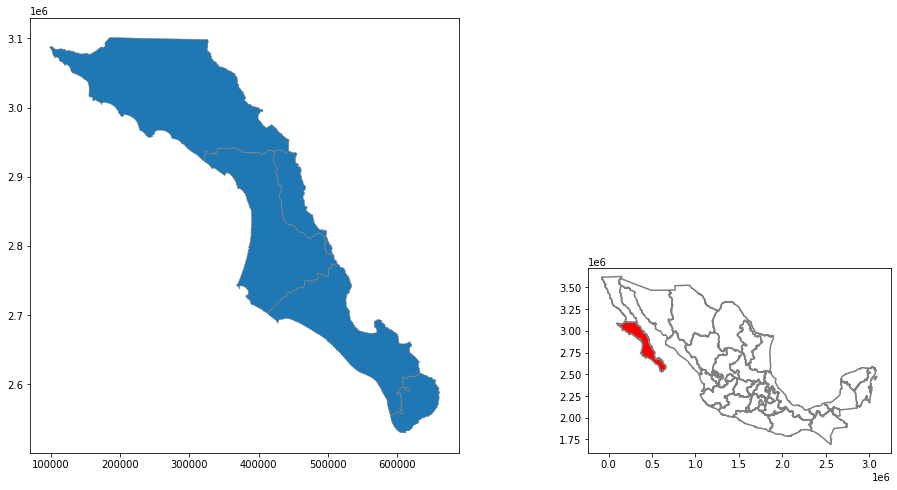

In [12]:
mx = gpd.read_file('mapa_mexico/')\
        .set_index('CLAVE')\
        .to_crs(epsg=4485)
bcs = mx.query('CVE_EDO=="03"')
edos = mx.dissolve(by='CVE_EDO')
fig, ax = plt.subplots()

# Mapa principal
bcs.plot(legend=True, ax=ax)

# Borde de los municipios
bcs.boundary.plot(linewidth=0.5, color='gray', ax=ax)

# Inserta recuadro
ax_mex = fig.add_axes([0.91, 0.11, 0.35, 0.35], )

# Dibuja los estados del país en el recuadro
edos.boundary.plot(color='gray', ax=ax_mex)

# Resalta Oaxaca con el color rojo
edos.query('CVE_EDO=="03"').plot(color='red', ax=ax_mex)

# Establece tamaño final
fig.set_size_inches(12, 8)

###### Datos del sitio: <i>La Paz, Baja California Sur</i>

In [13]:
radiation_data = {
    "Mes": ["Enero", "Marzo", "Mayo", "Julio"],
    "Radiación del sitio [kW/m2]": [4.4, 6, 6.5, 6.3]
}

location_data = {
    "Estado": ["Baja California Sur"],
    "Ciudad": ["La Paz"],
    "Latitud": 24.14437,
    "Longitud": -110.3005
}


collector_data = {
    "Area [m2]": [2*1],
    "Ángulo inclinación": 24.14437
}

days_data = {
    "Mes": ["Enero", "Enero", "Enero", "Enero", "Marzo", "Marzo", "Marzo", "Marzo", 
            "Mayo", "Mayo", "Mayo", "Mayo", "Julio", "Julio", "Julio", "Julio"],
    "Fecha": ["06-01-2021", "13-01-2021", "20-01-2021", "27-01-2021",
             "07-03-2021", "14-03-2021", "21-03-2021", "28-03-2021",
             "08-05-2021", "15-05-2021", "22-05-2021", "29-05-2021",
             "09-07-2021", "16-07-2021", "23-07-2021", "30-07-2021"]
}


radiation_lp = pd.DataFrame(radiation_data)
sitio_lp = pd.DataFrame(location_data)
colector = pd.DataFrame(collector_data)
days = pd.DataFrame(days_data)
days["Núm. día del año"] = days["Fecha"].apply(lambda x: getNumYearDay(x))

In [14]:
#Se imprime información de la radiación del sitio en os meses de estudio
radiation_lp

,Mes,Radiación del sitio [kW/m2]
0,Enero,4.4
1,Marzo,6.0
2,Mayo,6.5
3,Julio,6.3


In [15]:
#Se imprime información del sitio
sitio_lp

,Estado,Ciudad,Latitud,Longitud
0,Baja California Sur,La Paz,24.14437,-110.3005


In [16]:
#Se imprime información del colector
colector

,Area [m2],Ángulo inclinación
0,2,24.14437


In [17]:
#Se imprime infomación sobre los días de estudio
days

,Mes,Fecha,Núm. día del año
0,Enero,06-01-2021,6
1,Enero,13-01-2021,13
2,Enero,20-01-2021,20
3,Enero,27-01-2021,27
4,Marzo,07-03-2021,66
5,Marzo,14-03-2021,73
6,Marzo,21-03-2021,80
7,Marzo,28-03-2021,87
8,Mayo,08-05-2021,128
9,Mayo,15-05-2021,135


###### Se calcula la radiación en los meses y días de estudio

In [18]:
resultados_lp = pd.DataFrame()
collector_angle = colector.iloc[0]["Ángulo inclinación"]
collector_area = colector.iloc[0]["Area [m2]"]
location_latitude_rads = math.radians(sitio_lp.iloc[0]["Latitud"])

for idx, row in days.iterrows():
    declination_angle_day = declinationAngle(days.iloc[idx]["Núm. día del año"])
    radiation_month = radiation_lp.query(f"Mes == '{row['Mes']}'")
    radiation_month = list(radiation_month["Radiación del sitio [kW/m2]"])[0]
    data_day={
        "Mes": [],
        "Fecha": [],
        "Hora": [],
        "Azimut [rads]": [],
        "Radiación [kW/m2]": [],
    }
    for _, row_h in hour_angles.iterrows():
        h = row_h["h [rads]"]
        hour = row_h["hora"]
        cos_theta, _ = angleIncidence(declination_angle_day, location_latitude_rads, h, collector_angle)
        _, azimut_h = azimut(declination_angle_day, location_latitude_rads, h)
        data_day["Mes"].append(row["Mes"])
        data_day["Fecha"].append(days.iloc[idx]["Fecha"])
        data_day["Hora"].append(hour)
        data_day["Azimut [rads]"].append(azimut_h)
        data_day["Radiación [kW/m2]"].append(magnitudeRadiation(collector_area, radiation_month, cos_theta))
    
    
    resultados_lp_tmp = pd.DataFrame(data_day)
    resultados_lp = pd.concat([resultados_lp, resultados_lp_tmp])
    
resultados_lp.reset_index(drop=True, inplace=True)

###### Se muestran los resultados

In [19]:
resultados_lp

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
0,Enero,06-01-2021,6:00,0.4860,4.520465
1,Enero,06-01-2021,8:00,0.6599,3.918068
2,Enero,06-01-2021,10:00,0.8765,3.477083
3,Enero,06-01-2021,12:00,1.0000,3.315671
4,Enero,06-01-2021,14:00,0.8765,3.477083
5,Enero,06-01-2021,16:00,0.6599,3.918068
6,Enero,06-01-2021,18:00,0.4860,4.520465
7,Enero,06-01-2021,20:00,0.3762,5.122863
8,Enero,13-01-2021,6:00,-0.3550,-3.337468
9,Enero,13-01-2021,8:00,-0.1983,-3.988773


###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio

In [20]:
pd.DataFrame(resultados_lp.loc[resultados_lp["Radiación [kW/m2]"].argmax()]).T

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
83,Mayo,22-05-2021,12:00,1,12.9558


###### Ahora se muestran los días con menor radiación, por ser resultados negativos se considera que en esos días y en esa hora la radiación fue nula, o sea, de 0 [kW/m2]

In [21]:
mask = resultados_lp["Radiación [kW/m2]"] <= 0
resultados_lp[mask]

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
8,Enero,13-01-2021,6:00,-0.3550,-3.337468
9,Enero,13-01-2021,8:00,-0.1983,-3.988773
10,Enero,13-01-2021,10:00,-0.0510,-4.465562
11,Enero,13-01-2021,12:00,1.0000,-4.640079
12,Enero,13-01-2021,14:00,-0.0510,-4.465562
13,Enero,13-01-2021,16:00,-0.1983,-3.988773
14,Enero,13-01-2021,18:00,-0.3550,-3.337468
15,Enero,13-01-2021,20:00,-0.5593,-2.686162
16,Enero,20-01-2021,6:00,-0.9963,-8.659407
17,Enero,20-01-2021,8:00,-0.9973,-8.604085


<div style="background:#BFD3FF; padding-top: 5px; padding-bottom: 5px; padding-right: 5px; padding-left: 5px">
    <h4><center>Sitio 2: Acapulco, Guerrero</center></h4>
</div>

###### Impresión de  la región de Guerrero

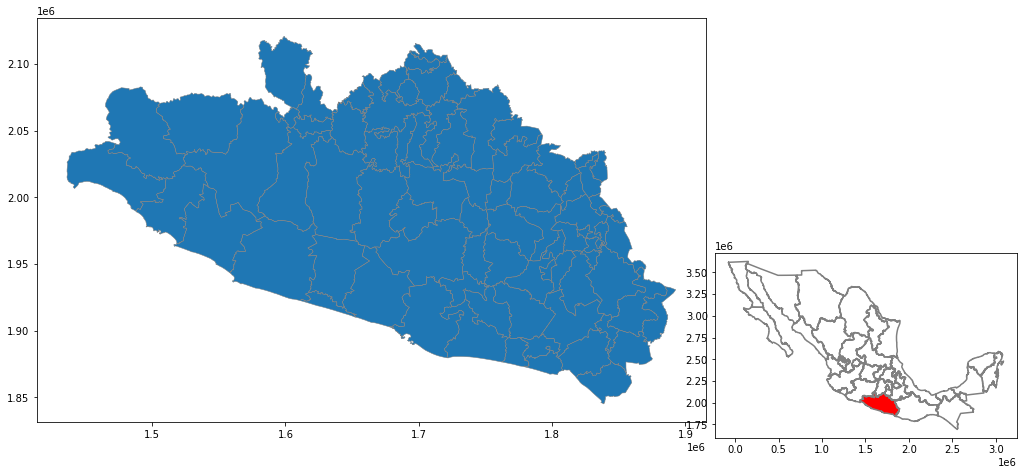

In [22]:
gro = mx.query('CVE_EDO=="12"')
fig, ax = plt.subplots()

# Mapa principal
gro.plot(legend=True, ax=ax)

# Borde de los municipios
gro.boundary.plot(linewidth=0.5, color='gray', ax=ax)

# Inserta recuadro
ax_mex = fig.add_axes([0.91, 0.11, 0.35, 0.35], )

# Dibuja los estados del país en el recuadro
edos.boundary.plot(color='gray', ax=ax_mex)

# Resalta Oaxaca con el color rojo
edos.query('CVE_EDO=="12"').plot(color='red', ax=ax_mex)

# Establece tamaño final
fig.set_size_inches(12, 8)

###### Datos del sitio: <i>Acapulco, Guerrero</i>

In [23]:
radiation_data = {
    "Mes": ["Enero", "Marzo", "Mayo", "Julio"],
    "Radiación del sitio [kW/m2]": [4.8, 5.3, 6.1, 5.9]
}

location_data = {
    "Estado": ["Guerrero"],
    "Sitio": ["Acapulco"],
    "Latitud": 16.84942,
    "Longitud": -99.90891
}


collector_data = {
    "Area [m2]": [2*1],
    "Ángulo inclinación": 16.84942
}

days_data = {
    "Mes": ["Enero", "Enero", "Enero", "Enero", "Marzo", "Marzo", "Marzo", "Marzo", 
            "Mayo", "Mayo", "Mayo", "Mayo", "Julio", "Julio", "Julio", "Julio"],
    "Fecha": ["06-01-2021", "13-01-2021", "20-01-2021", "27-01-2021",
             "07-03-2021", "14-03-2021", "21-03-2021", "28-03-2021",
             "08-05-2021", "15-05-2021", "22-05-2021", "29-05-2021",
             "09-07-2021", "16-07-2021", "23-07-2021", "30-07-2021"]
}


radiation_acp = pd.DataFrame(radiation_data)
sitio_acp = pd.DataFrame(location_data)
colector = pd.DataFrame(collector_data)
days = pd.DataFrame(days_data)
days["Núm. día del año"] = days["Fecha"].apply(lambda x: getNumYearDay(x))

In [24]:
#Se imprime información de la radiación del sitio en os meses de estudio
radiation_acp

,Mes,Radiación del sitio [kW/m2]
0,Enero,4.8
1,Marzo,5.3
2,Mayo,6.1
3,Julio,5.9


In [25]:
#Se imprime información del sitio
sitio_acp

,Estado,Sitio,Latitud,Longitud
0,Guerrero,Acapulco,16.84942,-99.90891


In [26]:
#Se imprime información del colector
colector

,Area [m2],Ángulo inclinación
0,2,16.84942


In [27]:
#Se imprime infomación sobre los días de estudio
days

,Mes,Fecha,Núm. día del año
0,Enero,06-01-2021,6
1,Enero,13-01-2021,13
2,Enero,20-01-2021,20
3,Enero,27-01-2021,27
4,Marzo,07-03-2021,66
5,Marzo,14-03-2021,73
6,Marzo,21-03-2021,80
7,Marzo,28-03-2021,87
8,Mayo,08-05-2021,128
9,Mayo,15-05-2021,135


###### Se calcula la radiación en los meses y días de estudio

In [28]:
resultados_acp = pd.DataFrame()
collector_angle = colector.iloc[0]["Ángulo inclinación"]
collector_area = colector.iloc[0]["Area [m2]"]
location_latitude_rads = math.radians(sitio_acp.iloc[0]["Latitud"])

for idx, row in days.iterrows():
    declination_angle_day = declinationAngle(days.iloc[idx]["Núm. día del año"])
    radiation_month = radiation_acp.query(f"Mes == '{row['Mes']}'")
    radiation_month = list(radiation_month["Radiación del sitio [kW/m2]"])[0]
    data_day={
        "Mes": [],
        "Fecha": [],
        "Hora": [],
        "Azimut [rads]": [],
        "Radiación [kW/m2]": [],
    }
    for _, row_h in hour_angles.iterrows():
        h = row_h["h [rads]"]
        hour = row_h["hora"]
        cos_theta, _ = angleIncidence(declination_angle_day, location_latitude_rads, h, collector_angle)
        _, azimut_h = azimut(declination_angle_day, location_latitude_rads, h)
        data_day["Mes"].append(row["Mes"])
        data_day["Fecha"].append(days.iloc[idx]["Fecha"])
        data_day["Hora"].append(hour)
        data_day["Azimut [rads]"].append(azimut_h)
        data_day["Radiación [kW/m2]"].append(magnitudeRadiation(collector_area, radiation_month, cos_theta))
    
    
    resultados_acp_tmp = pd.DataFrame(data_day)
    resultados_acp = pd.concat([resultados_acp, resultados_acp_tmp])
    
resultados_acp.reset_index(drop=True, inplace=True)

###### Se muestran los resultados

In [30]:
resultados_acp

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
0,Enero,06-01-2021,6:00,0.5038,3.744778
1,Enero,06-01-2021,8:00,0.6436,6.457956
2,Enero,06-01-2021,10:00,0.8578,8.444140
3,Enero,06-01-2021,12:00,1.0000,9.171134
4,Enero,06-01-2021,14:00,0.8578,8.444140
5,Enero,06-01-2021,16:00,0.6436,6.457956
6,Enero,06-01-2021,18:00,0.5038,3.744778
7,Enero,06-01-2021,20:00,0.4516,1.031601
8,Enero,13-01-2021,6:00,-0.3700,-2.764777
9,Enero,13-01-2021,8:00,-0.2808,0.168683


###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio

In [31]:
pd.DataFrame(resultados_acp.loc[resultados_acp["Radiación [kW/m2]"].argmax()]).T

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
107,Julio,16-07-2021,12:00,1,11.541


###### Ahora se muestran los días con menor radiación, por ser resultados negativos se considera que en esos días y en esa hora la radiación fue nula, o sea, de 0 [kW/m2]

In [32]:
mask = resultados_acp["Radiación [kW/m2]"] <= 0
resultados_acp[mask]

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
8,Enero,13-01-2021,6:00,-0.3700,-2.764777
14,Enero,13-01-2021,18:00,-0.3700,-2.764777
15,Enero,13-01-2021,20:00,-0.5314,-5.698237
16,Enero,20-01-2021,6:00,-0.9966,-7.173500
17,Enero,20-01-2021,8:00,-0.9975,-7.422669
18,Enero,20-01-2021,10:00,-0.9992,-7.605074
19,Enero,20-01-2021,12:00,-1.0000,-7.671838
20,Enero,20-01-2021,14:00,-0.9992,-7.605074
21,Enero,20-01-2021,16:00,-0.9975,-7.422669
22,Enero,20-01-2021,18:00,-0.9966,-7.173500


<div style="background: #FFABB6; padding-top: 5px; padding-bottom: 5px; padding-right: 5px; padding-left: 5px">
    <h4><center>Sitio 3: Puebla, Puebla</center></h4>
</div>

###### Impresión de  la región de Puebla

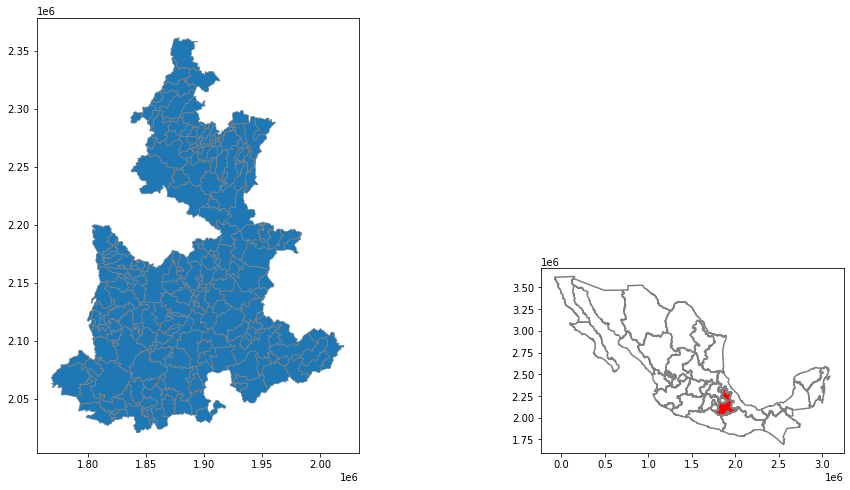

In [33]:
pue = mx.query('CVE_EDO=="21"')
fig, ax = plt.subplots()

# Mapa principal
pue.plot(legend=True, ax=ax)

# Borde de los municipios
pue.boundary.plot(linewidth=0.5, color='gray', ax=ax)

# Inserta recuadro
ax_mex = fig.add_axes([0.91, 0.11, 0.35, 0.35], )

# Dibuja los estados del país en el recuadro
edos.boundary.plot(color='gray', ax=ax_mex)

# Resalta Oaxaca con el color rojo
edos.query('CVE_EDO=="21"').plot(color='red', ax=ax_mex)

# Establece tamaño final
fig.set_size_inches(12, 8)

###### Datos del sitio: <i>Puebla, Puebla</i>

In [34]:
radiation_data = {
    "Mes": ["Enero", "Marzo", "Mayo", "Julio"],
    "Radiación del sitio [kW/m2]": [4.9, 5.5, 6.2, 6.4]
}

location_data = {
    "Estado": ["Puebla"],
    "Sitio": ["Puebla"],
    "Latitud": 19.03793,
    "Longitud": -98.20346
}


collector_data = {
    "Area [m2]": [2*1],
    "Ángulo inclinación": 19.03793
}

days_data = {
    "Mes": ["Enero", "Enero", "Enero", "Enero", "Marzo", "Marzo", "Marzo", "Marzo", 
            "Mayo", "Mayo", "Mayo", "Mayo", "Julio", "Julio", "Julio", "Julio"],
    "Fecha": ["06-01-2021", "13-01-2021", "20-01-2021", "27-01-2021",
             "07-03-2021", "14-03-2021", "21-03-2021", "28-03-2021",
             "08-05-2021", "15-05-2021", "22-05-2021", "29-05-2021",
             "09-07-2021", "16-07-2021", "23-07-2021", "30-07-2021"]
}


radiation_pue = pd.DataFrame(radiation_data)
sitio_pue = pd.DataFrame(location_data)
colector = pd.DataFrame(collector_data)
days = pd.DataFrame(days_data)
days["Núm. día del año"] = days["Fecha"].apply(lambda x: getNumYearDay(x))

In [35]:
#Se imprime información de la radiación del sitio en os meses de estudio
radiation_pue

,Mes,Radiación del sitio [kW/m2]
0,Enero,4.9
1,Marzo,5.5
2,Mayo,6.2
3,Julio,6.4


In [36]:
#Se imprime información del sitio
sitio_pue

,Estado,Sitio,Latitud,Longitud
0,Puebla,Puebla,19.03793,-98.20346


In [37]:
#Se imprime información del colector
colector

,Area [m2],Ángulo inclinación
0,2,19.03793


In [38]:
#Se imprime infomación sobre los días de estudio
days

,Mes,Fecha,Núm. día del año
0,Enero,06-01-2021,6
1,Enero,13-01-2021,13
2,Enero,20-01-2021,20
3,Enero,27-01-2021,27
4,Marzo,07-03-2021,66
5,Marzo,14-03-2021,73
6,Marzo,21-03-2021,80
7,Marzo,28-03-2021,87
8,Mayo,08-05-2021,128
9,Mayo,15-05-2021,135


###### Se calcula la radiación en los meses y días de estudio

In [39]:
resultados_pue = pd.DataFrame()
collector_angle = colector.iloc[0]["Ángulo inclinación"]
collector_area = colector.iloc[0]["Area [m2]"]
location_latitude_rads = math.radians(sitio_pue.iloc[0]["Latitud"])

for idx, row in days.iterrows():
    declination_angle_day = declinationAngle(days.iloc[idx]["Núm. día del año"])
    radiation_month = radiation_pue.query(f"Mes == '{row['Mes']}'")
    radiation_month = list(radiation_month["Radiación del sitio [kW/m2]"])[0]
    data_day={
        "Mes": [],
        "Fecha": [],
        "Hora": [],
        "Azimut [rads]": [],
        "Radiación [kW/m2]": [],
    }
    for _, row_h in hour_angles.iterrows():
        h = row_h["h [rads]"]
        hour = row_h["hora"]
        cos_theta, _ = angleIncidence(declination_angle_day, location_latitude_rads, h, collector_angle)
        _, azimut_h = azimut(declination_angle_day, location_latitude_rads, h)
        data_day["Mes"].append(row["Mes"])
        data_day["Fecha"].append(days.iloc[idx]["Fecha"])
        data_day["Hora"].append(hour)
        data_day["Azimut [rads]"].append(azimut_h)
        data_day["Radiación [kW/m2]"].append(magnitudeRadiation(collector_area, radiation_month, cos_theta))
    
    
    resultados_pue_tmp = pd.DataFrame(data_day)
    resultados_pue = pd.concat([resultados_pue, resultados_pue_tmp])
    
resultados_pue.reset_index(drop=True, inplace=True)

###### Se muestran los resultados

In [40]:
resultados_pue

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
0,Enero,06-01-2021,6:00,0.4992,0.731381
1,Enero,06-01-2021,8:00,0.6492,-3.409528
2,Enero,06-01-2021,10:00,0.8642,-6.440883
3,Enero,06-01-2021,12:00,1.0000,-7.550437
4,Enero,06-01-2021,14:00,0.8642,-6.440883
5,Enero,06-01-2021,16:00,0.6492,-3.409528
6,Enero,06-01-2021,18:00,0.4992,0.731381
7,Enero,06-01-2021,20:00,0.4305,4.872290
8,Enero,13-01-2021,6:00,-0.3661,-0.539980
9,Enero,13-01-2021,8:00,-0.2570,-5.017089


###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio

In [41]:
pd.DataFrame(resultados_pue.loc[resultados_pue["Radiación [kW/m2]"].argmax()]).T

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
75,Mayo,15-05-2021,12:00,-1,12.149


###### Ahora se muestran los días con menor radiación, por ser resultados negativos se considera que en esos días y en esa hora la radiación fue nula, o sea, de 0 [kW/m2]

In [42]:
mask = resultados_pue["Radiación [kW/m2]"] <= 0
resultados_pue[mask]

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
1,Enero,06-01-2021,8:00,0.6492,-3.409528
2,Enero,06-01-2021,10:00,0.8642,-6.440883
3,Enero,06-01-2021,12:00,1.0000,-7.550437
4,Enero,06-01-2021,14:00,0.8642,-6.440883
5,Enero,06-01-2021,16:00,0.6492,-3.409528
8,Enero,13-01-2021,6:00,-0.3661,-0.539980
9,Enero,13-01-2021,8:00,-0.2570,-5.017089
10,Enero,13-01-2021,10:00,-0.2166,-8.294560
11,Enero,13-01-2021,12:00,-1.0000,-9.494198
12,Enero,13-01-2021,14:00,-0.2166,-8.294560


<div style="background: #FFF663; padding-top: 5px; padding-bottom: 5px; padding-right: 5px; padding-left: 5px">
    <h4><center>Sitio 4: Chetumal, Quintana Roo</center></h4>
</div>

###### Impresión de  la región de Quintana Roo

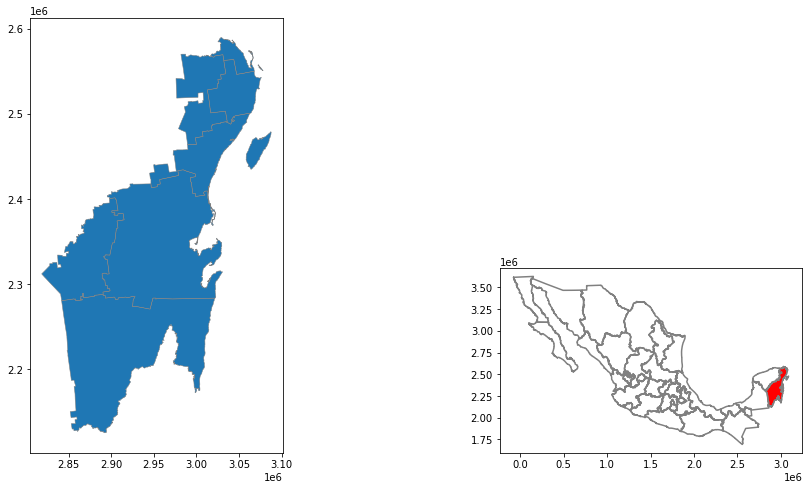

In [43]:
qroo = mx.query('CVE_EDO=="23"')
fig, ax = plt.subplots()

# Mapa principal
qroo.plot(legend=True, ax=ax)

# Borde de los municipios
qroo.boundary.plot(linewidth=0.5, color='gray', ax=ax)

# Inserta recuadro
ax_mex = fig.add_axes([0.91, 0.11, 0.35, 0.35], )

# Dibuja los estados del país en el recuadro
edos.boundary.plot(color='gray', ax=ax_mex)

# Resalta Oaxaca con el color rojo
edos.query('CVE_EDO=="23"').plot(color='red', ax=ax_mex)

# Establece tamaño final
fig.set_size_inches(12, 8)

###### Datos del sitio: <i>Chetumal, Quintana Roo</i>

In [44]:
radiation_data = {
    "Mes": ["Enero", "Marzo", "Mayo", "Julio"],
    "Radiación del sitio [kW/m2]": [3.9, 4.7, 5.4, 5.7]
}

location_data = {
    "Estado": ["Quintana Roo"],
    "Sitio": ["Chetumal"],
    "Latitud": 18.51413,
    "Longitud": -88.30381
}


collector_data = {
    "Area [m2]": [2*1],
    "Ángulo inclinación": 19.03793
}

days_data = {
    "Mes": ["Enero", "Enero", "Enero", "Enero", "Marzo", "Marzo", "Marzo", "Marzo", 
            "Mayo", "Mayo", "Mayo", "Mayo", "Julio", "Julio", "Julio", "Julio"],
    "Fecha": ["06-01-2021", "13-01-2021", "20-01-2021", "27-01-2021",
             "07-03-2021", "14-03-2021", "21-03-2021", "28-03-2021",
             "08-05-2021", "15-05-2021", "22-05-2021", "29-05-2021",
             "09-07-2021", "16-07-2021", "23-07-2021", "30-07-2021"]
}


radiation_cht = pd.DataFrame(radiation_data)
sitio_cht = pd.DataFrame(location_data)
colector = pd.DataFrame(collector_data)
days = pd.DataFrame(days_data)
days["Núm. día del año"] = days["Fecha"].apply(lambda x: getNumYearDay(x))

In [45]:
#Se imprime información de la radiación del sitio en os meses de estudio
radiation_cht

,Mes,Radiación del sitio [kW/m2]
0,Enero,3.9
1,Marzo,4.7
2,Mayo,5.4
3,Julio,5.7


In [46]:
#Se imprime información del sitio
sitio_cht

,Estado,Sitio,Latitud,Longitud
0,Quintana Roo,Chetumal,18.51413,-88.30381


In [47]:
#Se imprime información del colector
colector

,Area [m2],Ángulo inclinación
0,2,19.03793


In [48]:
#Se imprime infomación sobre los días de estudio
days

,Mes,Fecha,Núm. día del año
0,Enero,06-01-2021,6
1,Enero,13-01-2021,13
2,Enero,20-01-2021,20
3,Enero,27-01-2021,27
4,Marzo,07-03-2021,66
5,Marzo,14-03-2021,73
6,Marzo,21-03-2021,80
7,Marzo,28-03-2021,87
8,Mayo,08-05-2021,128
9,Mayo,15-05-2021,135


###### Se calcula la radiación en los meses y días de estudio

In [49]:
resultados_cht = pd.DataFrame()
collector_angle = colector.iloc[0]["Ángulo inclinación"]
collector_area = colector.iloc[0]["Area [m2]"]
location_latitude_rads = math.radians(sitio_cht.iloc[0]["Latitud"])

for idx, row in days.iterrows():
    declination_angle_day = declinationAngle(days.iloc[idx]["Núm. día del año"])
    radiation_month = radiation_cht.query(f"Mes == '{row['Mes']}'")
    radiation_month = list(radiation_month["Radiación del sitio [kW/m2]"])[0]
    data_day={
        "Mes": [],
        "Fecha": [],
        "Hora": [],
        "Azimut [rads]": [],
        "Radiación [kW/m2]": [],
    }
    for _, row_h in hour_angles.iterrows():
        h = row_h["h [rads]"]
        hour = row_h["hora"]
        cos_theta, _ = angleIncidence(declination_angle_day, location_latitude_rads, h, collector_angle)
        _, azimut_h = azimut(declination_angle_day, location_latitude_rads, h)
        data_day["Mes"].append(row["Mes"])
        data_day["Fecha"].append(days.iloc[idx]["Fecha"])
        data_day["Hora"].append(hour)
        data_day["Azimut [rads]"].append(azimut_h)
        data_day["Radiación [kW/m2]"].append(magnitudeRadiation(collector_area, radiation_month, cos_theta))
    
    
    resultados_cht_tmp = pd.DataFrame(data_day)
    resultados_cht = pd.concat([resultados_cht, resultados_cht_tmp])
    
resultados_cht.reset_index(drop=True, inplace=True)

###### Se muestran los resultados

In [50]:
resultados_cht

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
0,Enero,06-01-2021,6:00,0.5004,0.545370
1,Enero,06-01-2021,8:00,0.6479,-2.754684
2,Enero,06-01-2021,10:00,0.8627,-5.170491
3,Enero,06-01-2021,12:00,1.0000,-6.054738
4,Enero,06-01-2021,14:00,0.8627,-5.170491
5,Enero,06-01-2021,16:00,0.6479,-2.754684
6,Enero,06-01-2021,18:00,0.5004,0.545370
7,Enero,06-01-2021,20:00,0.4356,3.845423
8,Enero,13-01-2021,6:00,-0.3671,-0.402647
9,Enero,13-01-2021,8:00,-0.2628,-3.970632


###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio###### De los resultados obtenidos, se consulta el día con mayor radiación dentro de los días y meses de estudio

In [51]:
pd.DataFrame(resultados_cht.loc[resultados_cht["Radiación [kW/m2]"].argmax()]).T

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
75,Mayo,15-05-2021,12:00,-1,10.6007


###### Ahora se muestran los días con menor radiación, por ser resultados negativos se considera que en esos días y en esa hora la radiación fue nula, o sea, de 0 [kW/m2]

In [52]:
mask = resultados_cht["Radiación [kW/m2]"] <= 0
resultados_cht[mask]

,Mes,Fecha,Hora,Azimut [rads],Radiación [kW/m2]
1,Enero,06-01-2021,8:00,0.6479,-2.754684
2,Enero,06-01-2021,10:00,0.8627,-5.170491
3,Enero,06-01-2021,12:00,1.0000,-6.054738
4,Enero,06-01-2021,14:00,0.8627,-5.170491
5,Enero,06-01-2021,16:00,0.6479,-2.754684
8,Enero,13-01-2021,6:00,-0.3671,-0.402647
9,Enero,13-01-2021,8:00,-0.2628,-3.970632
10,Enero,13-01-2021,10:00,-0.2327,-6.582578
11,Enero,13-01-2021,12:00,-1.0000,-7.538616
12,Enero,13-01-2021,14:00,-0.2327,-6.582578


<h2>Conclusiones</h2>

###### Datos estadísticos de los resultados

In [53]:
# Para La Pax, Baja California Sur
pd.DataFrame(resultados_lp.describe()["Radiación [kW/m2]"])

,Radiación [kW/m2]
count,128.000000
mean,0.862699
std,6.920178
min,-12.857345
25%,-4.281640
50%,1.062870
75%,5.807103
max,12.955757


In [54]:
# Acapulco, Guerrero
pd.DataFrame(resultados_acp.describe()["Radiación [kW/m2]"])

,Radiación [kW/m2]
count,128.000000
mean,0.787231
std,6.468208
min,-10.768127
25%,-5.234330
50%,0.615886
75%,6.685681
max,11.540989


In [55]:
# Puebla, Puebla
pd.DataFrame(resultados_pue.describe()["Radiación [kW/m2]"])

,Radiación [kW/m2]
count,128.000000
mean,-0.206678
std,5.836357
min,-12.466509
25%,-4.981673
50%,-0.321208
75%,4.507654
max,12.149020


In [56]:
# Para Chetumal, Quintana Roo
pd.DataFrame(resultados_cht.describe()["Radiación [kW/m2]"])

,Radiación [kW/m2]
count,128.000000
mean,-0.171865
std,5.015048
min,-11.078886
25%,-4.203383
50%,-0.243117
75%,3.801638
max,10.600726


Con los datos descriptivos anteriores podemos observar que el promedio de radiación para los sitios de estudio sigue el siguiente orden:
* La Pax, Baja California Sur: 0.862699 Promedio de Radiación [kW/m2]
* Acapulco, Guerrero: 0.787231 Promedio de Radiación [kW/m2]
* Puebla, Puebla: -0.206678 Promedio de Radiación [kW/m2], que es igual a 0 [kW/m2]
* Chetumal, Quintana Roo: -0.171865 Promedio de Radiación [kW/m2], que es igual a 0 [kW/m2]

Por los promedios de radiación sabemos que el lugar mas rentable para realizar un proyecto que aproveche la radiación solar es en La Paz, Baja Calafinornia Sur y el lugar con menos rentabilidad sería Chetumal, Quintana Roo.